In [3]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib import dates
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline

import requests #this allows one to grab data from url
from bs4 import BeautifulSoup #manipulate url data
import json
from pandas import DataFrame as df 

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
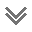

In [4]:
 #grabbing data from url
web_page = requests.get("https://www.worldometers.info/coronavirus")
soup = BeautifulSoup(web_page.text, 'html.parser')
print(soup.prettify())

In [5]:
covid_data = soup.find_all("div", class_ = "maincounter-number" )
print("coronavirus cases: ", covid_data[0].text.strip())
print("coronavirus deaths: ", covid_data[1].text.strip())
print("coronavirus recovery: ", covid_data[2].text.strip())

data = soup.find_all("script", {"type": "text/javascript"})
for content in data:
    print(content)

coronavirus cases:  704,753,890
coronavirus deaths:  7,010,681
coronavirus recovery:  675,619,811
<script src="https://cdn.datatables.net/1.10.19/js/jquery.dataTables.min.js" type="text/javascript"></script>
<script src="https://cdn.datatables.net/1.10.19/js/dataTables.bootstrap.min.js" type="text/javascript"></script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#example2').dataTable( {
        "scrollCollapse": true,
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#table3').dataTable( {
        "scrollCollapse": true,
				 "order": [[ 1, 'desc' ]],
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<script class="init" type="text/javascript">
		$

In [6]:
result = soup.find(id='main_table_countries_today')
content = result.find_all('td')
content

[<td></td>,
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>,
 <td>131,889,132</td>,
 <td></td>,
 <td>1,695,941</td>,
 <td></td>,
 <td>127,665,129</td>,
 <td>+350</td>,
 <td>2,528,062</td>,
 <td>6,095</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="North America" style="display:none;">North America</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>,
 <td>221,500,265</td>,
 <td></td>,
 <td>1,553,662</td>,
 <td></td>,
 <td>205,673,091</td>,
 <td></td>,
 <td>14,273,512</td>,
 <td>14,733</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="Asia" style="display:none;">Asia</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>Europe</nobr>
 </td>,
 <td>253,406,198</td>,
 <td></td>,
 <td>2,101,824</td>,
 <td></td>,
 <td>248,754,104<

In [7]:
clean_data = ""
for data in content:
    clean_data += data.text.strip() + "|"
    clean_data = clean_data.replace("+", "")
    clean_data = clean_data.replace("N/A", "0")
#clean_data

In [19]:
import re
countries =[ 
'USA','India','France','Germany','Brazil','S. Korea','Japan','Italy','UK','Russia','Turkey','Spain','Australia','Vietnam','Taiwan','Argentina','Netherlands','Mexico','Iran','Indonesia','Poland',
'Colombia','Greece','Austria','Portugal','Ukraine','Chile','Malaysia','Canada','Belgium','Israel','DPRK','Thailand','Czechia','Peru','Switzerland','Philippines','South Africa','Romania','Denmark','Singapore',
'Hong Kong','Sweden','New Zealand','Serbia','Iraq','Hungary','Bangladesh','Slovakia','Georgia','Jordan','Ireland','Pakistan','Finland','Norway','Kazakhstan','Lithuania','Slovenia','Bulgaria','Croatia','Guatemala',
'Morocco','Lebanon','Costa Rica','Bolivia','Tunisia','Cuba','Ecuador','UAE','Panama','Uruguay','Mongolia','Nepal','Belarus','Latvia','Saudi Arabia','Paraguay','Azerbaijan','Bahrain','Cyprus','Dominican Republic',
'Sri Lanka','Kuwait','Myanmar','Moldova','Estonia','Palestine','Venezuela','Egypt','Qatar','Libya','China','Ethiopia','Réunion','Honduras','Armenia','Bosnia and Herzegovina','Oman','Luxembourg','North Macedonia',
'Zambia','Kenya','Brunei','Albania','Botswana','Montenegro','Algeria','Nigeria','Zimbabwe','Uzbekistan','Afghanistan''Mozambique','Martinique','Laos','Iceland','Kyrgyzstan','Guadeloupe','El Salvador','Trinidad and Tobago',
'Maldives','Namibia','Uganda','Ghana','Jamaica','Cambodia','Rwanda','Cameroon','Malta','Barbados','Angola','Channel Islands','DRC','French Guiana','Malawi','Senegal','Ivory Coast','Suriname','New Caledonia','French Polynesia',
'Eswatini','Guyana','Belize','Fiji','Madagascar','Cabo Verde','Sudan','Mauritania','Bhutan','Syria','Burundi','Seychelles','Gabon','Andorra','Papua New Guinea','Curaçao','Aruba','Tanzania','Mauritius','Mayotte','Togo','Guinea',
'Bahamas','Isle of Man','Lesotho','Haiti','Faeroe Islands','Mali','Cayman Islands','Saint Lucia','Benin','Macao','Somalia','Micronesia','San Marino','Solomon Islands''Congo','Timor-Leste','Burkina Faso','Liechtenstein','Gibraltar',
'Grenada','Bermuda','South Sudan','Nicaragua','Tajikistan','Equatorial Guinea','Monaco','Samoa','Tonga','Marshall Islands','Dominica','Djibouti','CAR','Gambia','Saint Martin','Vanuatu','Greenland','Yemen','Caribbean Netherlands',
'Sint Maarten','Eritrea','Niger','St. Vincent Grenadines','Guinea-Bissau','Comoros','Antigua and Barbuda','Liberia','Sierra Leone','Chad','British Virgin Islands','Cook Islands','Sao Tome and Principe','Turks and Caicos',
'Saint Kitts and Nevis','Palau','St. Barth','Nauru','Kiribati','Anguilla','Wallis and Futuna','Saint Pierre Miquelon','Tuvalu','Saint Helena','Falkland Islands','Montserrat','Niue','Diamond Princess','Tokelau','Vatican City','Western Sahara','MS Zaandam'
]
for c in countries:
    pattern = c + "[,|\d]*"
    data = re.search(pattern,clean_data,re.IGNORECASE)
    if data is not None:
        list1 = data.group() 
        labels =['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered',
           'Active Cases', 'Serious/Critical', 'Total Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
           'Population']
        print(list1)
# series3 = pd.Series(data=list1,index=labels)
# series3

USA|111,820,082||1,219,487||109,814,428||786,167|940|333,985|3,642|1,186,851,502|3,544,901|334,805,269|
India|45,035,393||533,570||0|0|0|0|32,016|379|935,879,495|665,334|1,406,631,776|
France|40,138,560||167,642||39,970,918||0||612,013|2,556|271,490,188|4,139,547|65,584,518|
Germany|38,828,995||183,027||38,240,600||405,368|0|462,891|2,182|122,332,384|1,458,359|83,883,596|
Brazil|38,743,918||711,380||36,249,161||1,783,377|0|179,908|3,303|63,776,166|296,146|215,353,593|
S. Korea|34,571,873||35,934||34,535,939||0||673,523|700|15,804,065|307,892|51,329,899|
Japan|33,803,572||74,694||0|0|0|0|269,169|595|100,414,883|799,578|125,584,838|
Italy|26,723,249||196,487||26,361,218||165,544|22|443,445|3,261|281,126,449|4,665,010|60,262,770|
UK|24,910,387||232,112||24,678,275||0|0|363,666|3,389|522,526,476|7,628,357|68,497,907|
Russia|24,124,215||402,756||23,545,818||175,641|0|165,454|2,762|273,400,000|1,875,095|145,805,947|
Turkey|17,232,066||102,174||0|0|0|0|201,399|1,194|162,743,369|1,902,052|85,5

<>:17: SyntaxWarning:

invalid escape sequence '\d'

<>:17: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\user\AppData\Local\Temp\ipykernel_9316\2639603801.py:17: SyntaxWarning:

invalid escape sequence '\d'



In [13]:
covid_df = pd.read_csv("owid-covid-data.csv")
covid_df.columns
country_df = covid_df.location.unique()
country_df

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

<Axes: xlabel='date'>

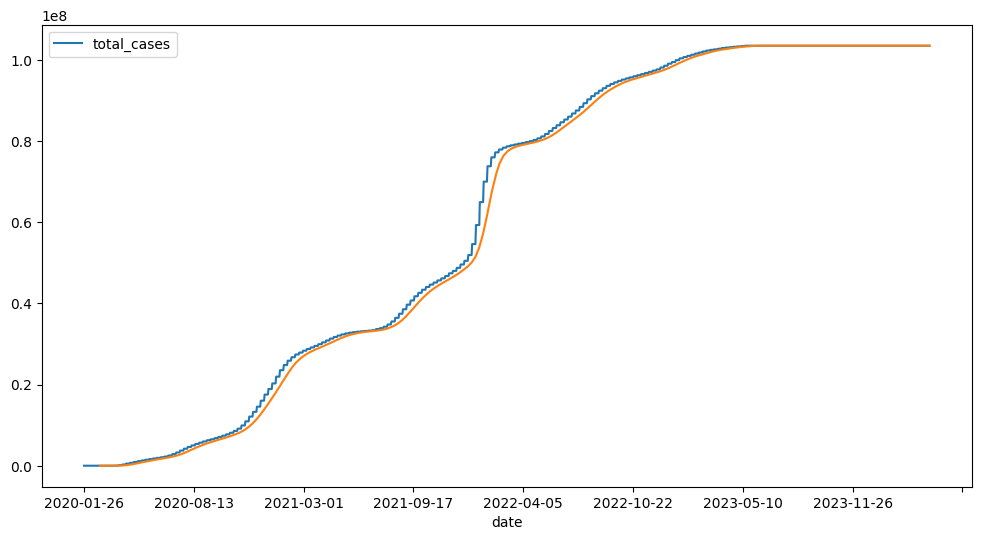

In [14]:
indexer = covid_df[covid_df['location']=='United States'].index
us_total_cases = covid_df.loc[indexer, 'date': 'total_cases']
us_total_cases = us_total_cases.dropna()
us_total_cases.set_index('date',inplace=True)
us_total_cases
us_total_cases.plot(figsize=(12,6))
us_total_cases.rolling(window=30).mean()['total_cases'].plot()

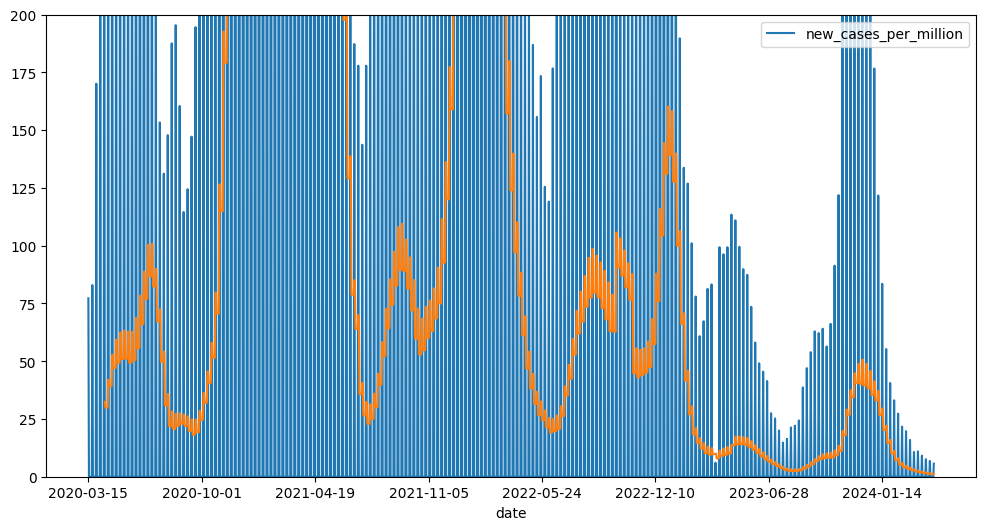

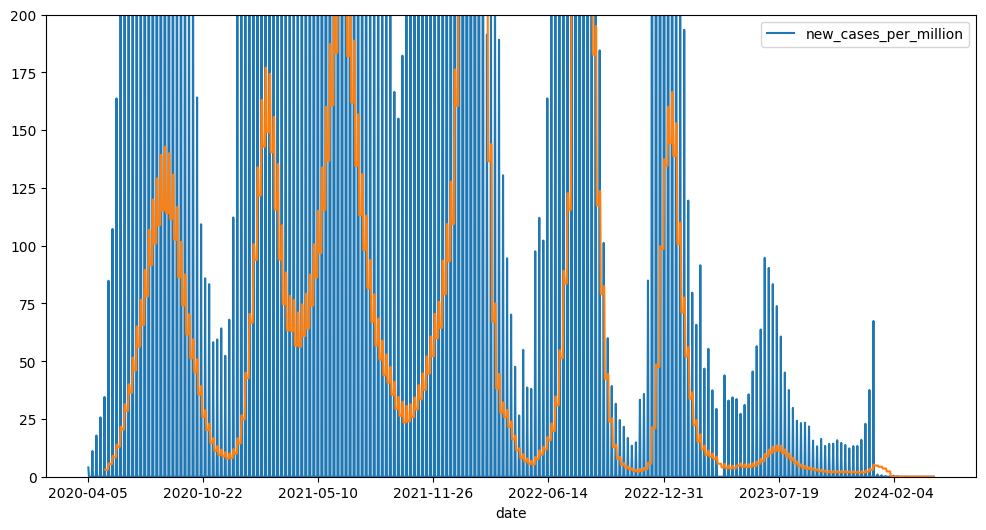

In [22]:
# checking if lockdown affected the spread of covid
def plot_covid_data(country, col, plot_ma=False, y_max=200):
    indexer = covid_df[covid_df['location']==country].index
    country_df = covid_df.loc[indexer, 'date': col]
    country_df = country_df.dropna()
    country_df.set_index('date',inplace=True)
    #country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.drop(columns=country_df.columns.difference([col]), inplace=True)
    country_df.plot(figsize=(12,6),ylim=[0,y_max])

    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()
plot_covid_data('Sweden', 'new_cases_per_million', True)#country that did not lock down
plot_covid_data('Bolivia', 'new_cases_per_million', True) #country that locked down

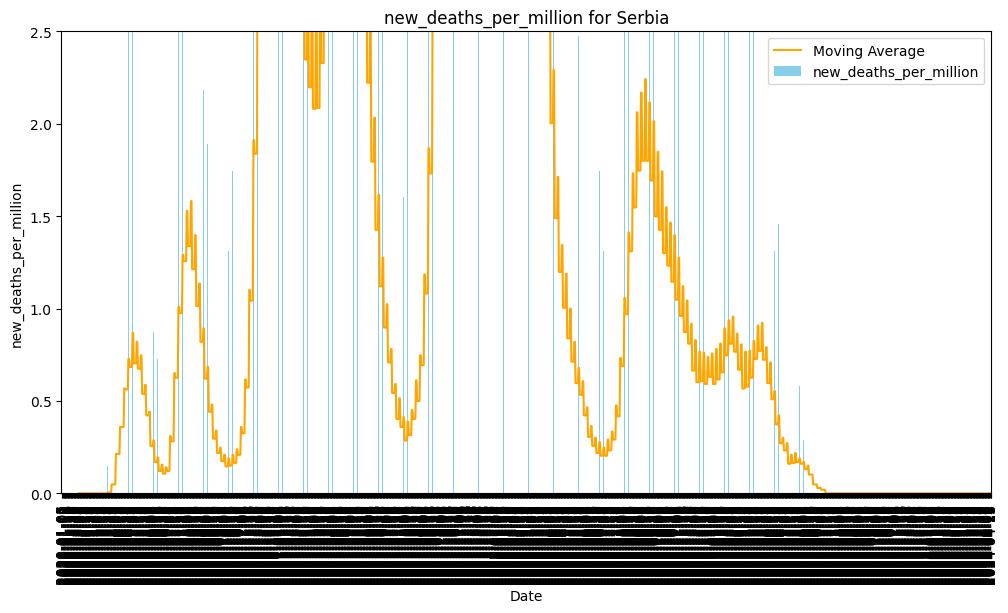

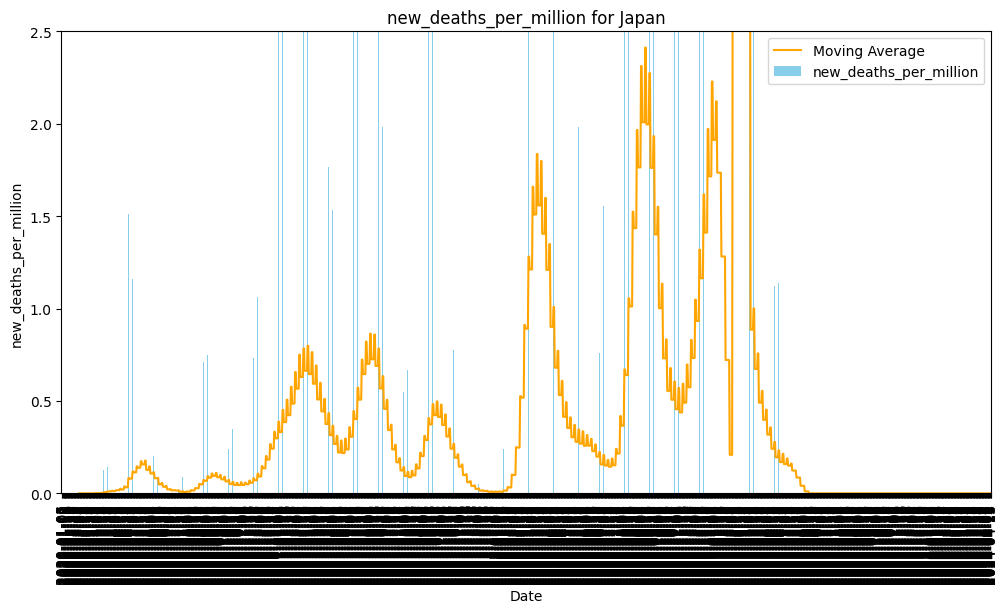

In [25]:
#checking how medium age affected death
plot_covid_data('Serbia', 'new_deaths_per_million', True,2.5)#country that has low mediam age
plot_covid_data('Japan', 'new_deaths_per_million', True,2.5) #country that has high medium age

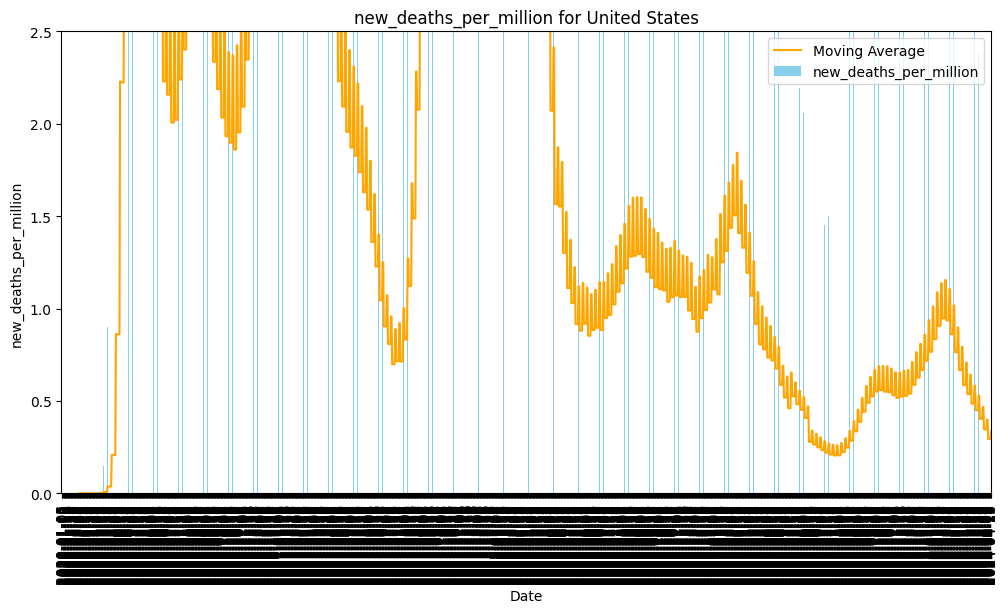

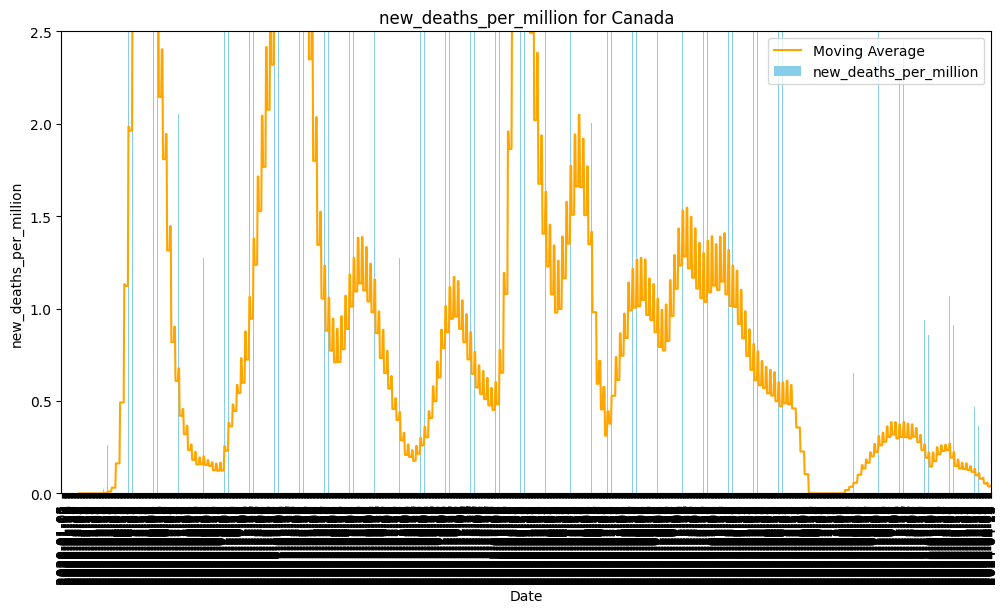

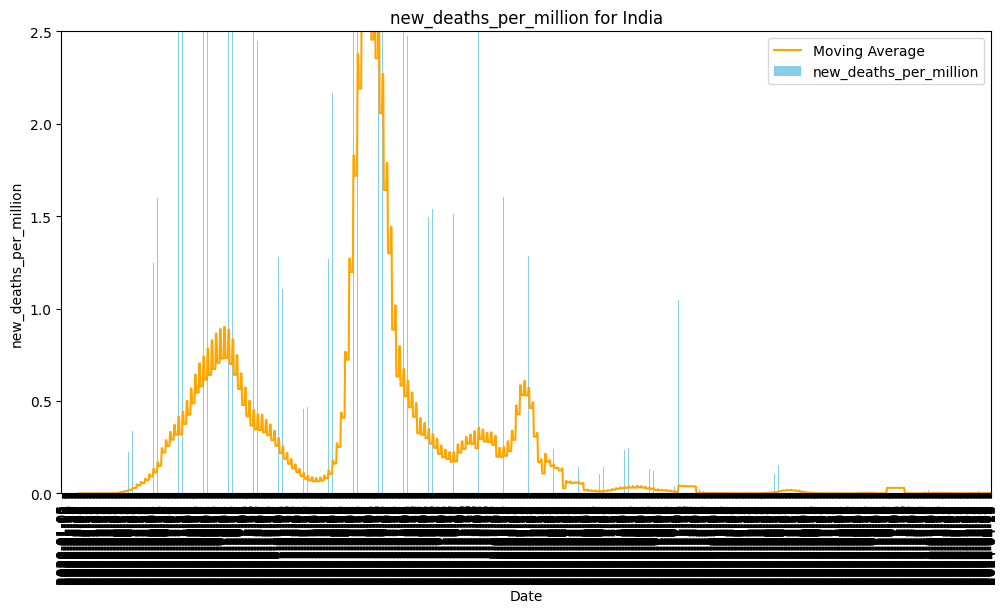

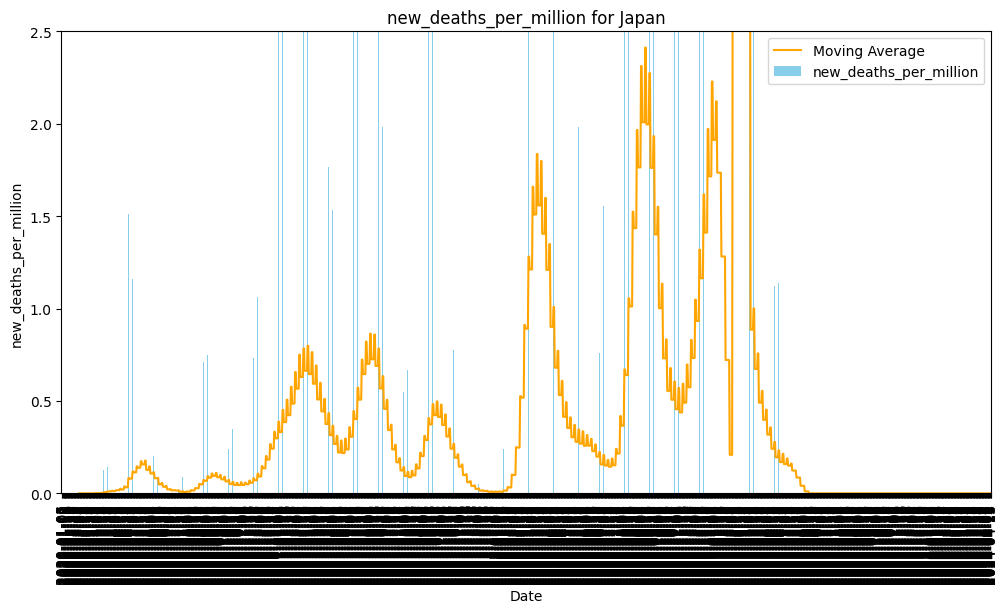

In [26]:
plot_covid_data('United States', 'new_deaths_per_million', True,2.5)#country that has high obesity
plot_covid_data('Canada', 'new_deaths_per_million', True,2.5)#country that has high obesity
plot_covid_data('India', 'new_deaths_per_million', True,2.5)##country that has low obesity
plot_covid_data('Japan', 'new_deaths_per_million', True,2.5)#country that has low obesity

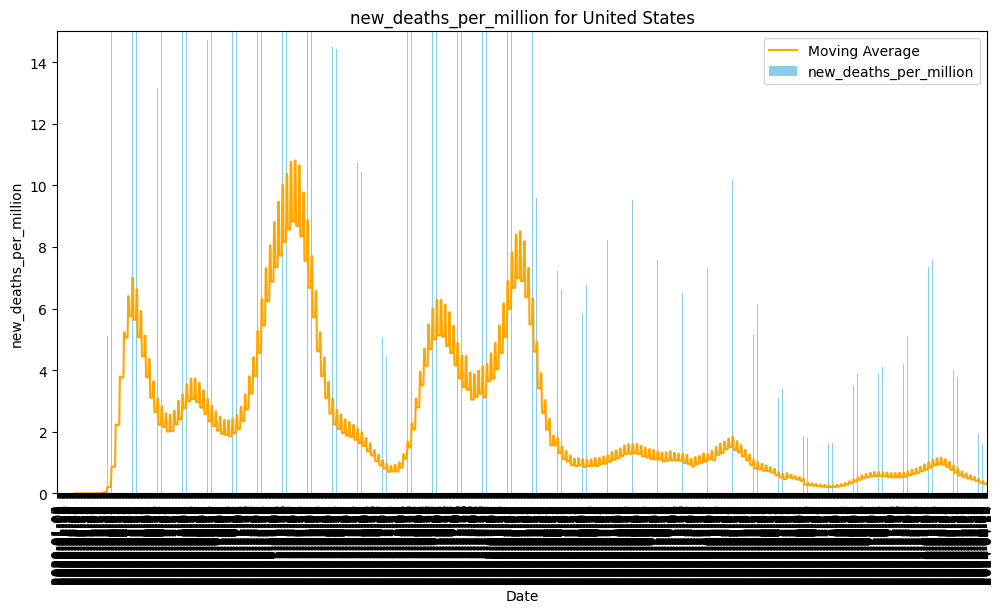

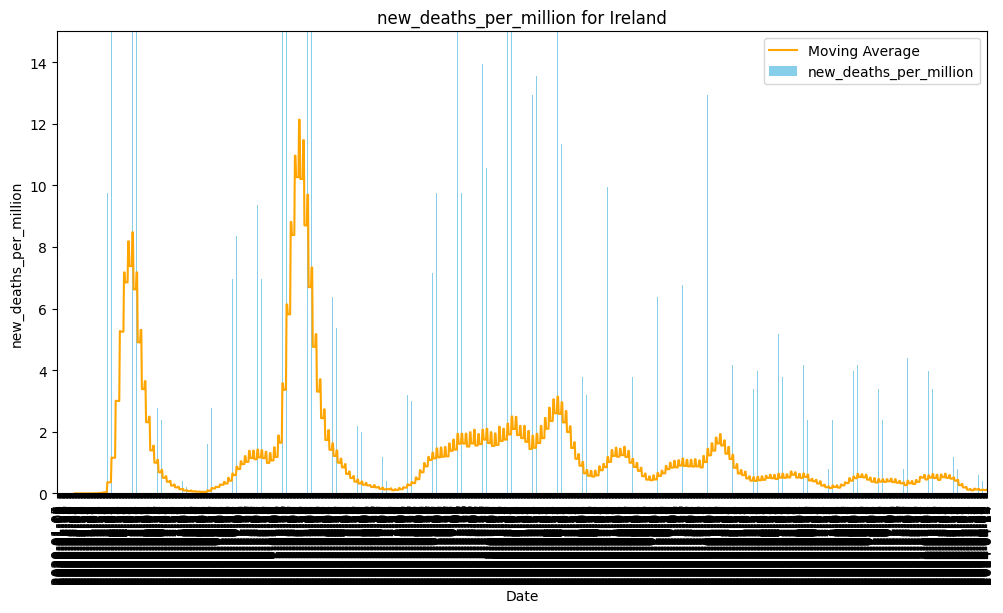

In [27]:
#how diabetes prevalence affected death
plot_covid_data('United States', 'new_deaths_per_million', True,15)#country that has low mediam age
plot_covid_data('Ireland', 'new_deaths_per_million', True,15)

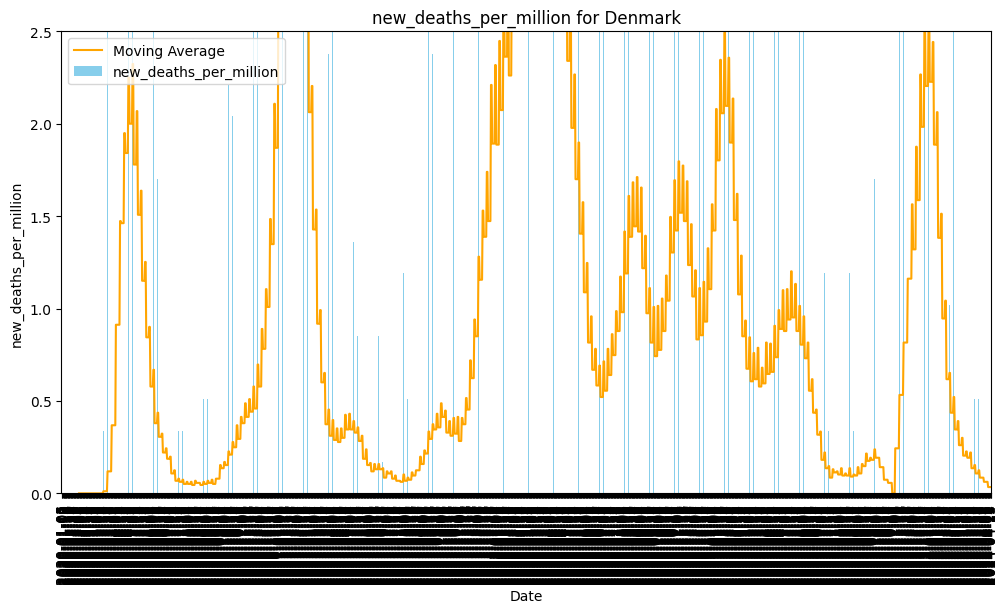

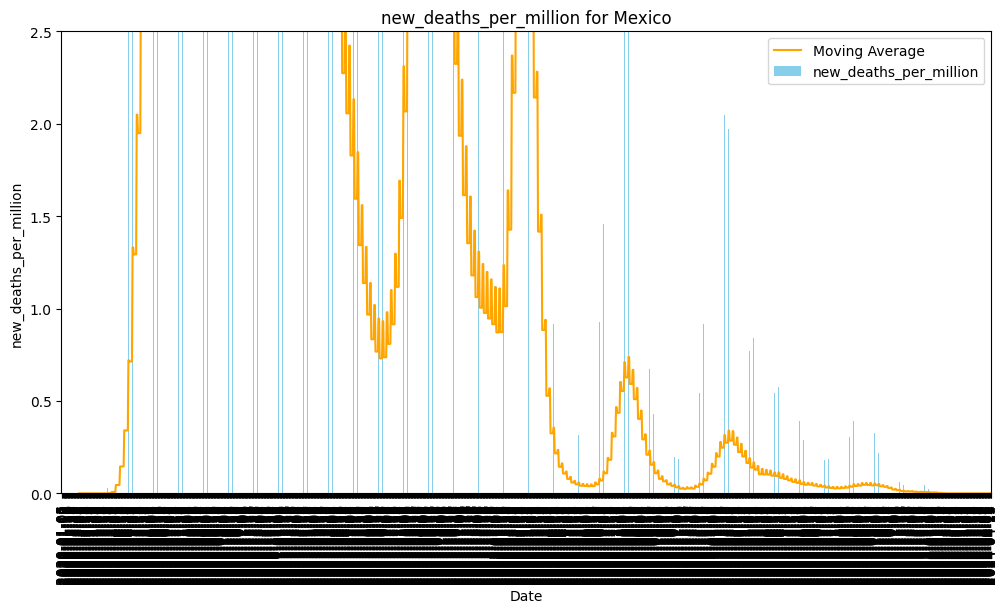

In [28]:
# how testing slow deathrate
plot_covid_data('Denmark', 'new_deaths_per_million', True,2.5)#country that has low mediam age
plot_covid_data('Mexico', 'new_deaths_per_million', True,2.5)